# Lab 8: K-Nearest Neighbors Classifier

In this session, we illustrate how well accuracy measure evaluate the performance of a classifier on the case of skewed class where the number of sample on a given class is very big compared to size of other classes. Then, present more robust measurement like "**precision**", "**recall**" and "**F1-score**" to evaluate performance a classifier.

In the second part, we will implement a **K-nearest classifier**. It is a simple classifier but it may be efficient to resolve several classification problem. Then, we will assess our classifier with the new explored measurement.

## Skewed Class
In this part, we will work with [breast cancer](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html) dataset from sklearn library. It contains 30 quantitative features and one target with two labels (0:malignant / 1:benign). For this example, we will only use "mean radius" of tumor feature and we will also discard some sample to make dataset classes skewed. Then, we will calculate the accuracy of "Naive_Classifier" that predict always 0 or 1. Finally, we will present the new measurements given above.

#### Confusion matrix
The confusion matrix is a specific table layout that allows visualization of the performance/error of a classification algorithm. Each row of the matrix represents the number of samples in each predicted class while each column represents the number of samples in each actual class.
![confusion_matrix](confusion_matrix.png)

- <font color="green">**TN (True Negative)**</font>**:** Number of sample predicted 0 (**Negative**) and they are actually in negative class 0 (**True** prediction). Also known as "Correct rejection"
- <font color="red">**FN (False Negative)**</font>**:** Number of sample predicted 0 (**Negative**) and they are actually in positive class 1 (**False** prediction). Also known as "Miss"
- <font color="red">**FP (False Positive)**</font>**:** Number of sample predicted 1 (**Positive**) and they are actually in negative class 0 (**False** prediction). Also known as "False alarm"
- <font color="green">**TP (True Positive)**</font>**:** Number of sample predicted 1 (**Positive**) and they are actually in positive class 1 (**True** prediction). Also known as "Hit"

#### Precision
Precision or positive predictive value is the fraction of the true positive prediction over all positive prediction (true and false ones). It reflect how confident is the classifier when detecting a positive sample. It is given by the following formulas:
$$precision=\frac{TP}{TP+FP}$$
Therefore, higher precision imply less false alarm (FP).

#### Recall
Recall or sensitivity is the fraction of the true positive prediction over all actual positive samples. It reflect how confident is the classifier when rejecting a sample. It is given by the following formulas:
$$recall=\frac{TP}{TP+FN}$$
Therefore, higher recall imply less positive sample non-detected (FN).  

In general, there is a trade-off between precision and recall. For example, with a logistic classifier if we try to increase the decision threshold (when the probability exceed this value we predict 1 as class)  to enhance precision the recall will decrease and vice versa as illustrated in the precision-recall curve below.

![precision vs recall curve](P_vs_R.png)

#### F1-score
Because of the trade-off between precision and recall we try other measurement, the F1-score, to evaluate the performance of the classifier. Therefore, we could use the F1-score as single value criteria to compare and choose between two models. This measurement reflect how well precision and recall. For instance, if both precision and recall are high the F1-score is high and vice versa.

The F1-score is given by the following formulas:
$$F_1=2\times \frac{precision\times recall}{precision+recall}$$

<font color="blue">**Question 1: **</font>
- Load cancer dataset using ["load_breast_cancer"](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html) function and explore it (what are feature_names/target_names/size/type...?). 
- Complete "fit" function in "Naive_Classifier" class in order to assign to "self.prediction" variable the most existing class (0 or 1) in "target" array.
- Call "predict" and "score" function from "Naive_Classifier" class to calculate "y_pred" and "accuracy" variable.


<class 'sklearn.utils.Bunch'>
['malignant' 'benign']
The number of  benign tumor:  357
The number of  malignant  tumor:  5
The accuracy of the Naive Classifier is 98.62 % !!!


<IPython.core.display.Javascript object>


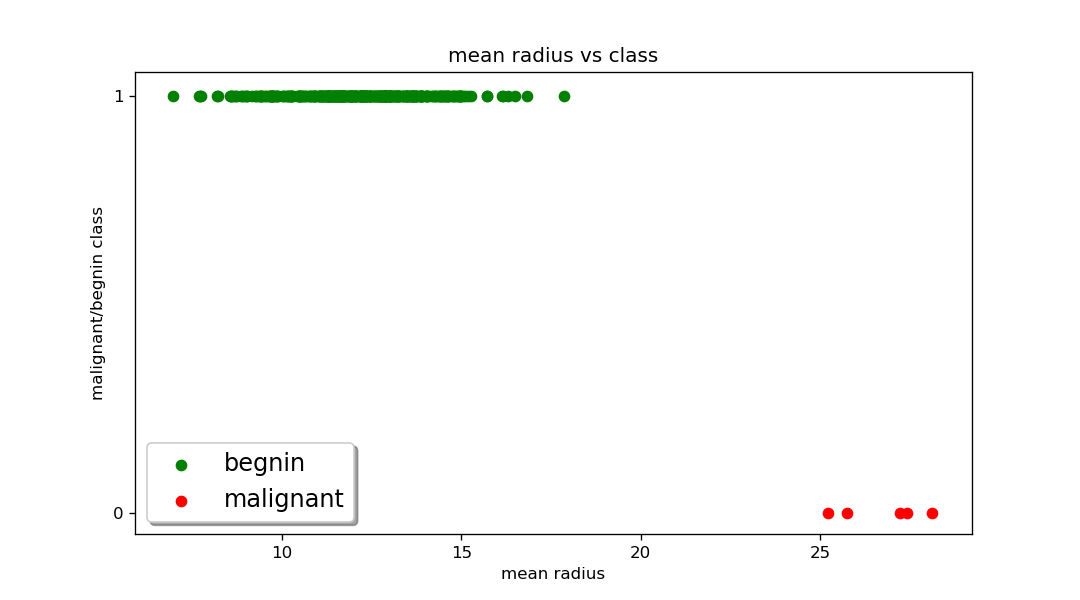

Text(0.5,1,'mean radius vs class')

In [1]:
% matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
import warnings

# load breast cancer dataset
cancer_database =  # ** your code here**

# print some information about the dataset
print(type(cancer_database))
print(cancer_database.target_names) #(0:malignant/1:benign)
#print(cancer_database.feature_names)
#print(cancer_database.DESCR)

# discard some samples
index=np.logical_or(cancer_database.data[:,0]>25,cancer_database.target==1)
X=cancer_database.data[index,:]
y=cancer_database.target[index,np.newaxis]

# number of malignant/benign tumor on the resulting dataset
nbr_begnin = np.sum(y==1)  
nbr_malignant = np.sum(y==0)
print("The number of  benign tumor: ",nbr_begnin)
print("The number of  malignant  tumor: ",nbr_malignant)

# implement Naive classifier
class Naive_Classifier():
    def __init__(self, default_prediction=None):
        if (default_prediction!=None):
            self.prediction = default_prediction
    def fit(self,data,target):
        self.m=data.shape[0]
        self.n=data.shape[1]
        if (target.shape[0]!=self.m):
            raise ValueError('The number of sample in the data and in the target are not equal!')
        # ** your code here**

    def predict(self,X):
        return self.prediction*np.ones((X.shape[0],1))
    def score(self,predict,target):
        if (predict.shape[0]!=target.shape[0]):
            #warnings.showwarning('The number of sample in the prediction and in the target are not equal!',UserWarning,sys.stderr,lineno='return (predict==target).sum()/target.shape[0]*100')
            raise ValueError('The number of sample in the prediction and in the target are not equal!')
        return (predict==target).sum()/target.shape[0]*100

# train and predict with naive classifier
naiv_clf=Naive_Classifier()
naiv_clf.fit(X,y)
y_pred =  # ** your code here**
accuracy =   # ** your code here**
print("The accuracy of the Naive Classifier is %.2f"%accuracy,"% !!!")

# plot dataset
plt.figure("cancer database",figsize=(9,5))
plt.scatter(X[(y==1)[:,0],0],y[y==1],label='begnin',color="green")
plt.scatter(X[(y==0)[:,0],0],y[y==0],label='malignant', color="red")
plt.legend(loc='lower left', shadow=True, fontsize='x-large')
plt.xlabel('mean radius')
plt.ylabel('malignant/begnin class')
plt.yticks([0,1])
plt.title('mean radius vs class')


<font color="blue">**Question 2: **</font>
- Calculate the following quantities FP (False Positive), FN (False Negative) and TN (True Negative).
**Hint:** You can use an expression with ["logical_and"](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.logical_and.html) function similarly to the calculation of TP (True Positive).
- Calculate "precision", "recall" and "F1_score" according to expressions given above.

In [2]:
from  sklearn import metrics

# calculate different metrics
tp=np.logical_and(y==1,y_pred==1).sum()
fp =  # ** your code here**
fn =  # ** your code here**
tn =  # ** your code here**

precision =  # ** your code here**
recall =   # ** your code here**
F1_score =  # ** your code here**


print("The calculated confusion matrix:\n", np.array([[tn,fp],[fn,tp]]))
print("The calculated precision: %.3f"%(100*precision),"%")
print("The calculated recall: %.3f"%(100*recall),"%")
print("The calculated F1_score: %.3f"%(100*F1_score),"%")
print()

# use defined metrics from sklearn library
print("The sklearn confusion matrix:\n",metrics.confusion_matrix(y, y_pred))
print("The sklearn precision:",metrics.precision_score(y, y_pred))
print("The sklearn recall:",metrics.recall_score(y, y_pred))
print("The sklearn F1_score:",metrics.f1_score(y, y_pred))
print("The sklearn classification report:\n",metrics.classification_report(y, y_pred))

The calculated confusion matrix:
 [[  0   5]
 [  0 357]]
The calculated precision: 98.619 %
The calculated recall: 100.000 %
The calculated F1_score: 99.305 %

The sklearn confusion matrix:
 [[  0   5]
 [  0 357]]
The sklearn precision: 0.986187845304
The sklearn recall: 1.0
The sklearn F1_score: 0.993045897079
The sklearn classification report:
              precision    recall  f1-score   support

          0       0.00      0.00      0.00         5
          1       0.99      1.00      0.99       357

avg / total       0.97      0.99      0.98       362



/home/sbenamor/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## K-Nearest Neighbors

The K-Nearest Neighbors algorithm is simple method used mainly for classification problem but there is also some version for regression problem. The main idea is to determine the most similar (closest) samples from the dataset to the new sample to predict. Then, we predict a value close and similar to the value of nearest neighbors from the dataset.  

In regression problem we determine ,for example, the 5 nearest sample (K=5) to our sample. Then, we predict as output the average  or weighted average of 5 nearest sample. There is several way to determine the weight. Some of them use constant weight. Other method use weight that inversely vary regarding the distance between our sample and neighbor and they use some kernel like "linear", "Gaussian"… to select these weights. 

While for Classification problem, we select the K-nearest neighbors. Then, we make a vote between neighbors to decide which label (class) to predict for our sample. In this case, K (number of neighbors) shouldn't be a multiple of number of class to avoid ambiguous vote. We could also use weighted vote regarding to the distance between neighbors and the sample to predict.

In this part, we will implement a K-nearest neighbors algorithm for classification problem. We will use euclidean distance to determine nearest neighbors. Then, we will use majority vote to decide which class to predict.

<font color="blue">**Question 3: **</font>
- Load data from "data_3.txt" file. (use [loadtxt](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.loadtxt.html) function from numpy library).
- Implement the "euclidean_dist" function that calculate the euclidean distance (norm L2: sum of square) between two vectors.
- Complete the "KNN" function:
     - You should use "euclidean_dist" to calculate the distance matrix "D" that contains distance between the "ith" sample to predict in the array "x" and each sample in the training set "data_x".
     - Then, you may use [argsort](https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html) function to determine indices that sort the matrix "D" among column and apply these indices to sort labels vector "data_y" from the nearest to the farthest neighbor.
     - Finally, you should call "Vote" function on the resulting sorted label vector to determine the prediction (most appeared class on the K nearest neighbors to the "ith" sample in "x" array)
- Implement "Vote" function that take a matrix "M" of labels of neighborhood and the number "k" of neighbors to consider in the vote. Then, for each column it determine the most appeared class on the K nearest neighbors (K first lines) this is the predicted class.

The size of training set is: (300, 3)
The size of test set is: (100, 3)
The predictions for stared point on the graph are: [ True  True False]
Test accuracy = 91.0 %


<IPython.core.display.Javascript object>


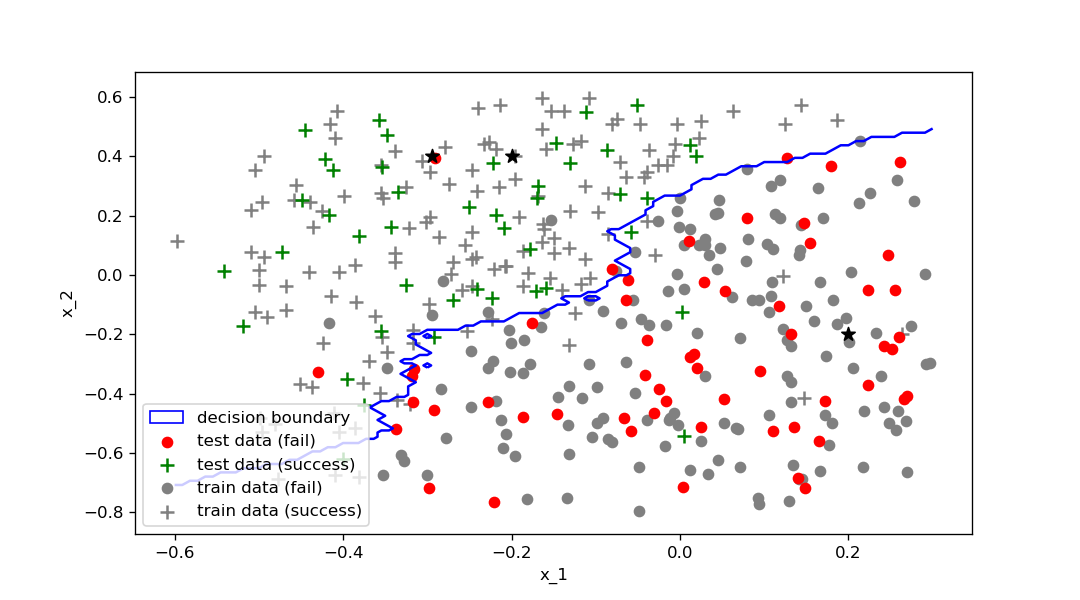

In [3]:
from sklearn.model_selection import train_test_split
from matplotlib.patches import Rectangle

# load data
data =    # ** your code here** 
train_data, test_data = train_test_split(data, test_size=0.25, random_state=0)
print("The size of training set is:",train_data.shape)
print("The size of test set is:",test_data.shape)

# extract data
X_train=train_data[:,:2]
y_train=train_data[:,2,np.newaxis].astype(int)   
X_test=test_data[:,:2]
y_test=test_data[:,2,np.newaxis].astype(int) 

def euclidean_dist(x1,x2):
    # ** your code here** 
    
    return 

def KNN(data_x,x,data_y,k):
    # data_x: training set point
    # x: points to predict
    # data_y: training set labels
    # k: number of nearest neighbors to concider
    # return: predition for each sample on "x" array
    
    pred=np.zeros((x.shape[0],1),dtype=int)
    for i in range(x.shape[0]):
        D=   # ** your code here** 
        # ** your code here** 
        pred[i,0] = # ** your code here** 
    return pred

def Vote(M,k):
    # M: neighborhood matrix it contains on each columns labels of the nearest neighbor in order.
    # return: predicted label for each columns (samples)
    # ** your code here** 
    
    return 

# number of nearest neighbors to concider
K=31

# try the K-nearest neighbors classifier
x_try = np.array([[-0.295,0.4],[-0.2,0.4],[0.2,-0.2]])
y_try_pred = KNN(X_train,x_try,y_train,K)
print("The predictions for stared point on the graph are:",y_try_pred[:,0]==1)

y_test_pred = KNN(X_train,X_test,y_train,K)
print("Test accuracy =",(y_test_pred==y_test).sum()*100/y_test.shape[0],"%")

# calculate the mesh grid for contour plot
u1=np.linspace(-0.6,0.3,100)
u2=np.linspace(-0.8,0.6,100)
u1, u2 = np.meshgrid(u1, u2)
X3=np.concatenate((u1[...,np.newaxis],u2[...,np.newaxis]),axis=-1)
X3bis=X3.reshape((X3.shape[0]*X3.shape[1],X3.shape[2]))
Zbis =  KNN(X_train,X3bis,y_train,K)
Z=Zbis.reshape((X3.shape[0],X3.shape[1]))

# plot data and boundary
plt.figure("K-nearest neighbors boundary",figsize=(9,5))
fail_train=plt.scatter(train_data[:,0][train_data[:,2]==0], train_data[:,1][train_data[:,2]==0],  color='gray',label='fail')
succ_train=plt.scatter(train_data[:,0][train_data[:,2]==1], train_data[:,1][train_data[:,2]==1],  color='gray',marker='+',s=80, label='success')
fail_test=plt.scatter(test_data[:,0][test_data[:,2]==0], test_data[:,1][test_data[:,2]==0],  color='red',label='fail')
succ_test=plt.scatter(test_data[:,0][test_data[:,2]==1], test_data[:,1][test_data[:,2]==1],  color='green',marker='+',s=80, label='success')
plt.scatter(x_try[:,0],x_try[:,1],color="black",marker='*',s=70)
ctr = plt.contour(u1, u2, Z,1,colors="blue")
plt.xlabel('x_1')
plt.ylabel('x_2')
boundary = Rectangle((0, 0), 3, 4, fc="w", fill=False, edgecolor="b", linewidth=1)
plt.legend([boundary,fail_test,succ_test,fail_train,succ_train], ("decision boundary","test data (fail)","test data (success)","train data (fail)","train data (success)"),loc='best')
